# Homework 4 Machine Learning
Shalom-David Anifowoshe and Yiping Deng

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### load data

In [2]:
data = pd.read_csv("data/mfeat-pix.txt",sep='\s+', header=None)

In [3]:
darr = data.values.astype(float)

### Visualization function

In [4]:
def img_cat(darr):
    """
    reshape the image and show the image
    """
    img_mat = darr.reshape(16, 15) # reshape the d array
    plt.imshow(img_mat, cmap='gray')
    plt.show()
def imgs_cat(darr):
    for rows in darr:
        img_cat(rows)

In [5]:
img_ones = darr[200:400] #select class 1

### Concrete implementation of k-means algorithm

In [6]:
def distance(p1, p2):
    diff = p1 - p2
    s = np.sum(np.power(diff, 2))
    return np.sqrt(s)

In [7]:
def classify(pixels, centers):
    # fit every points into its correspending clusters
    num_centers, _ = centers.shape
    num_pixels, _ = pixels.shape
    distances = np.zeros((num_centers, num_pixels))
    for i in range(num_centers):
        for j in range(num_pixels):
            distances[i][j] = distance(centers[i], pixels[j])
    return np.argmin(distances, axis = 0)

In [8]:
def find_cluster(pixels, centers):
    # return the new center
    
    num_centers, _ = centers.shape
    num_pixels, dim = pixels.shape
    
    classified = classify(pixels, centers)
    # print(classified)
    for c in range(num_centers):
        sum = np.zeros(dim)
        count = 0
        for i in range(num_pixels):
            if(classified[i] == c):
                sum = sum + pixels[i]
                count = count + 1
        mean = sum / count
        centers[c] = mean
    return centers

In [9]:
def k_means(pixels, k, iter = 2):
    # k-means algorithm for k class and iter iterations
    centers = pixels[0:k] #k class
    for _ in range(iter):
        centers = find_cluster(pixels, centers)
    return centers

## Visualization of k = 1, 2, 3, 200

k = 1


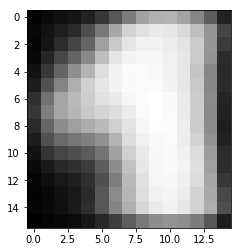

In [15]:
# k = 1
print("k = 1")
centers = k_means(img_ones, 1, 10)
imgs_cat(centers)

k = 2


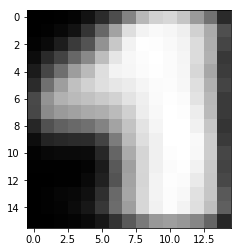

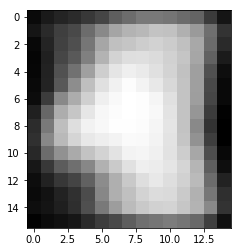

In [16]:
# k = 2
print("k = 2")
centers = k_means(img_ones, 2, 10)
imgs_cat(centers)

k = 3


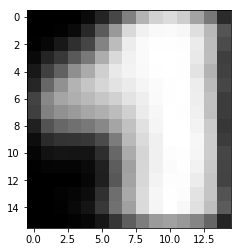

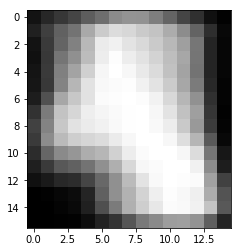

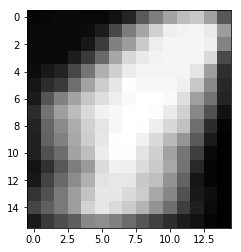

In [17]:
# k = 3
print("k = 3")
centers = k_means(img_ones, 3, 10)
imgs_cat(centers)

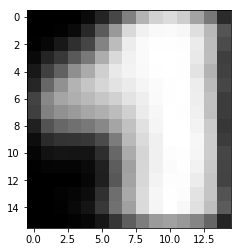

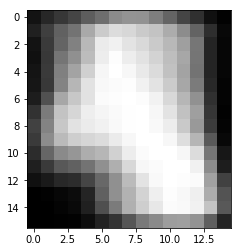

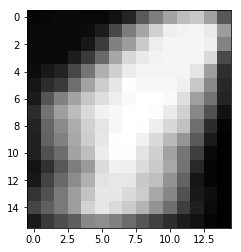

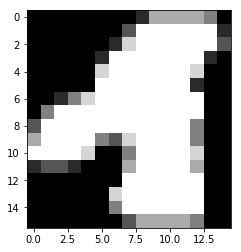

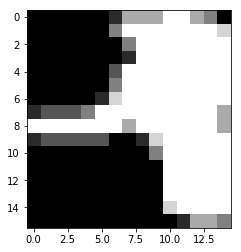

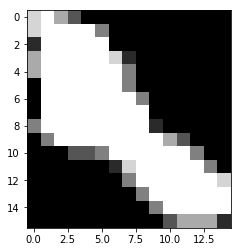

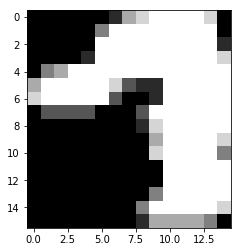

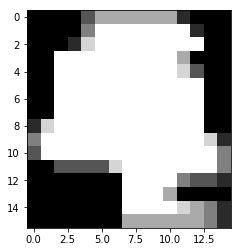

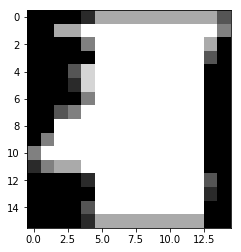

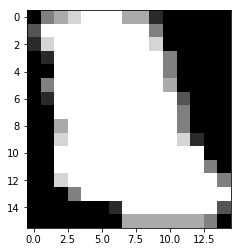

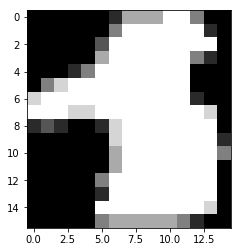

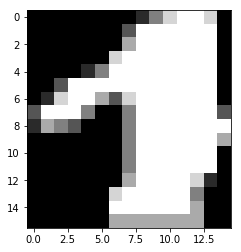

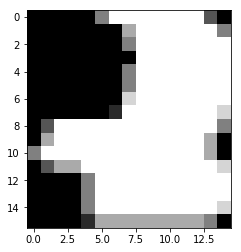

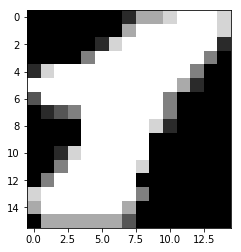

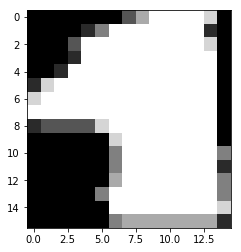

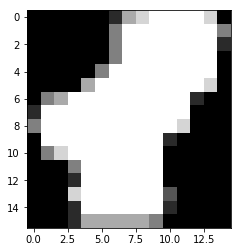

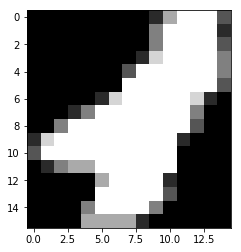

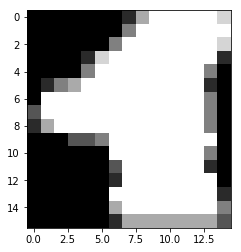

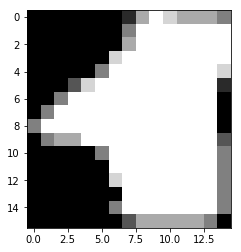

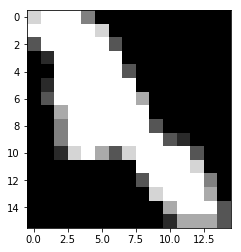

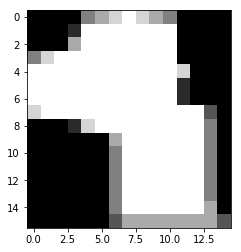

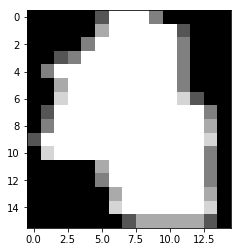

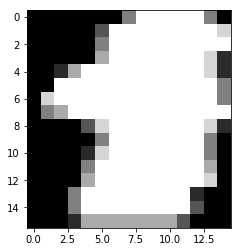

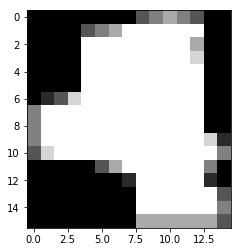

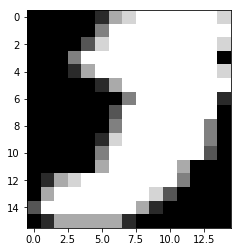

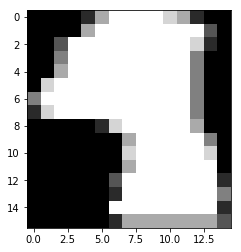

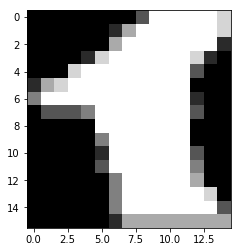

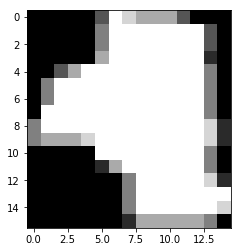

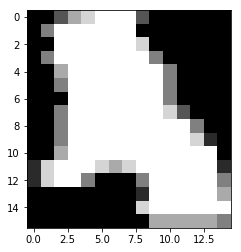

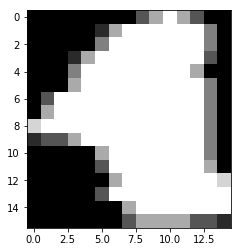

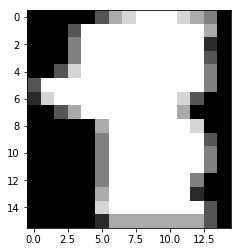

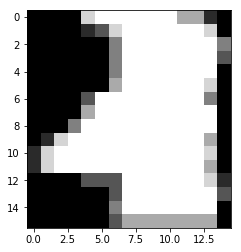

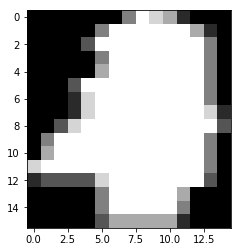

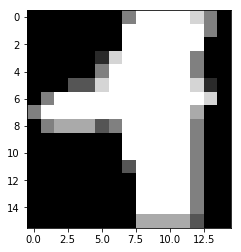

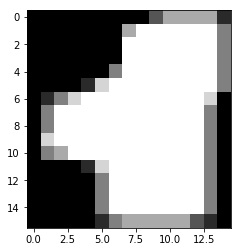

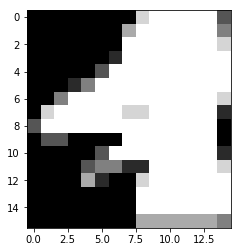

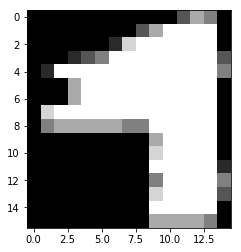

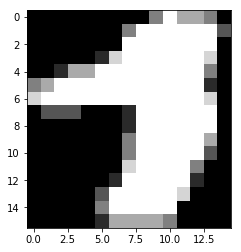

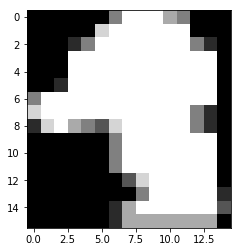

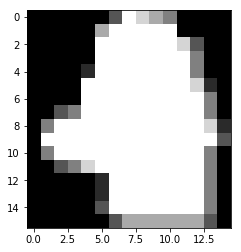

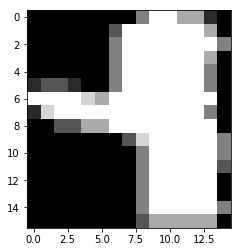

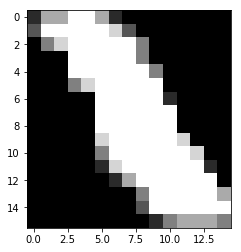

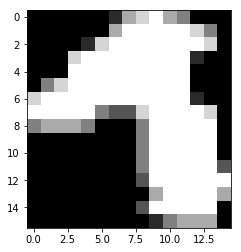

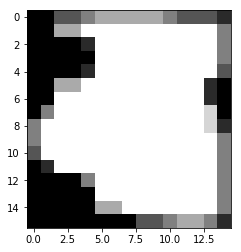

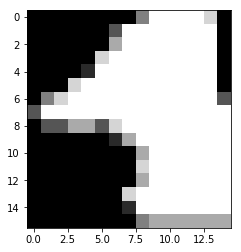

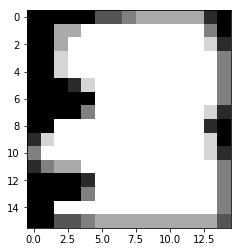

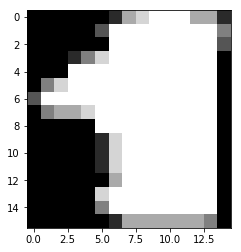

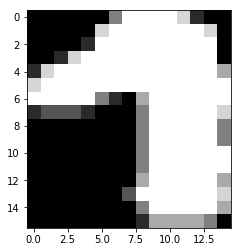

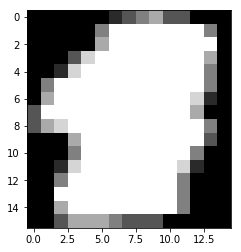

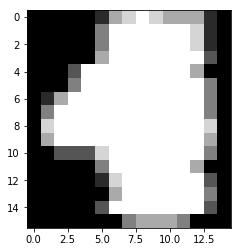

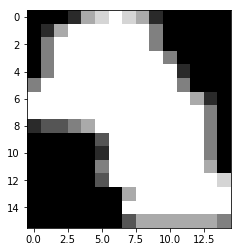

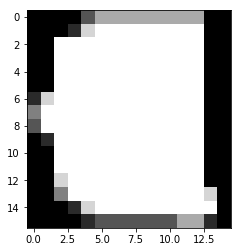

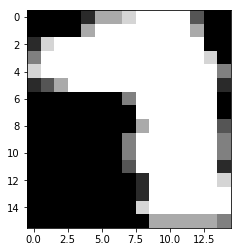

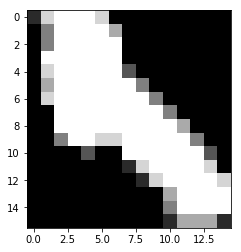

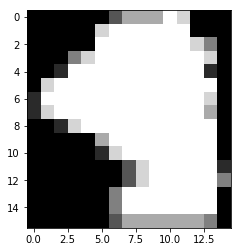

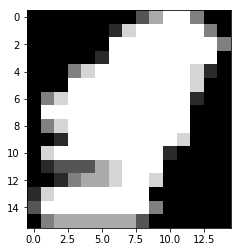

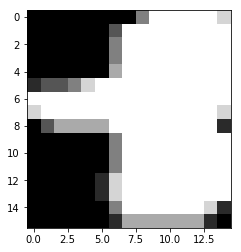

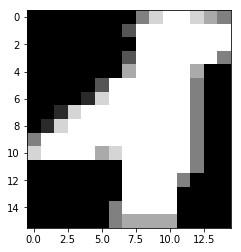

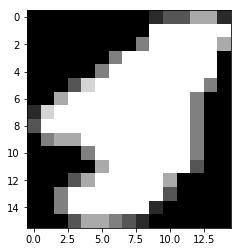

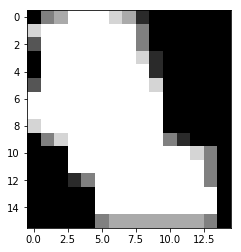

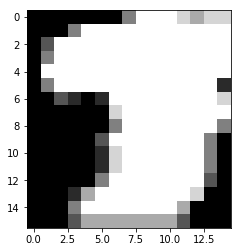

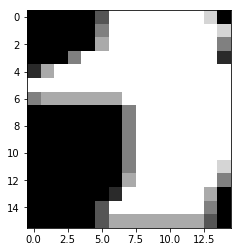

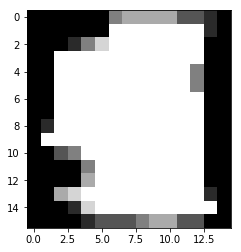

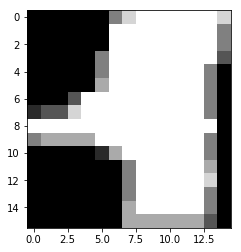

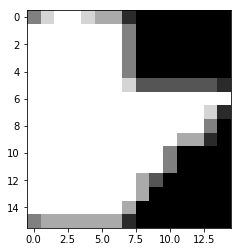

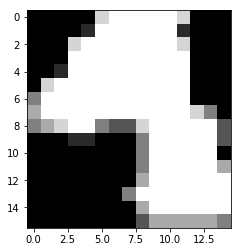

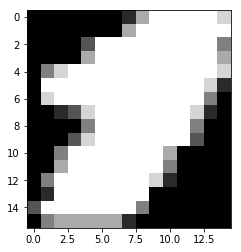

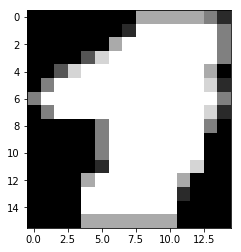

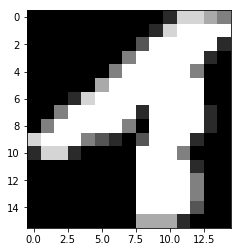

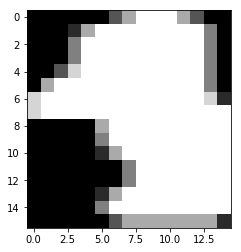

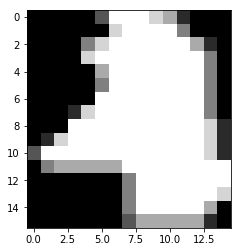

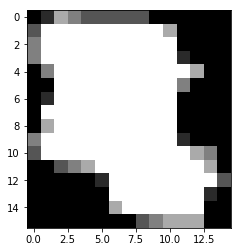

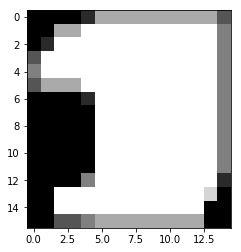

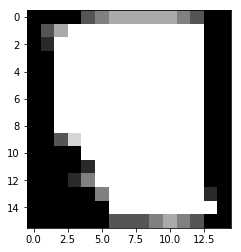

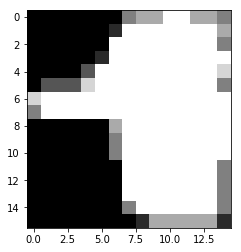

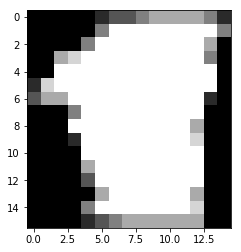

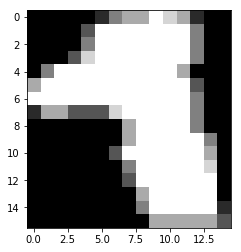

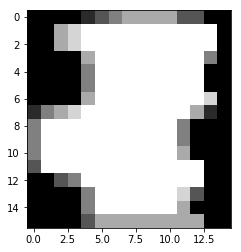

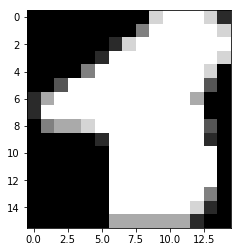

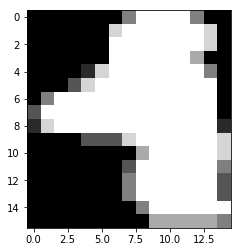

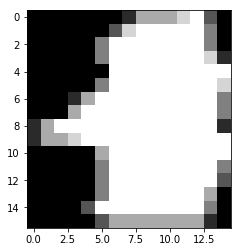

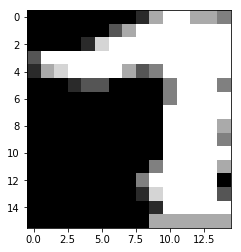

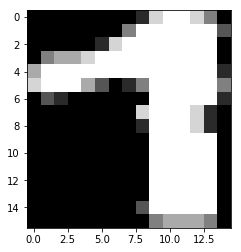

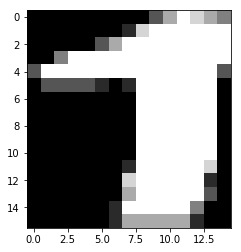

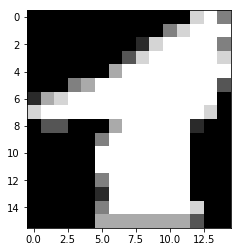

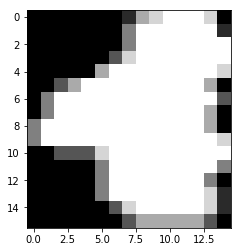

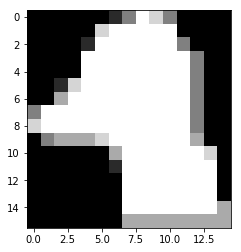

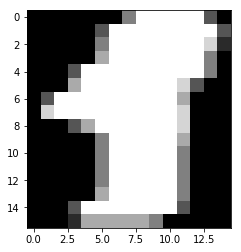

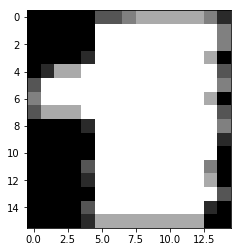

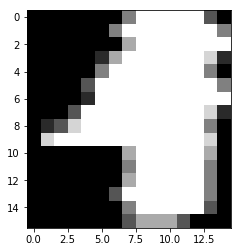

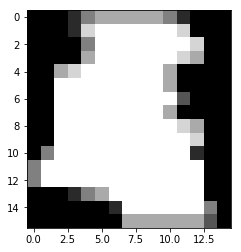

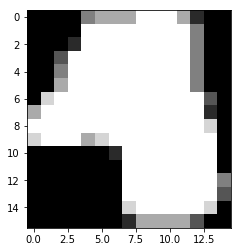

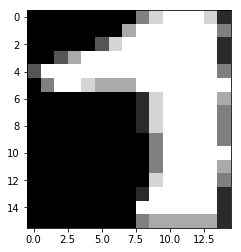

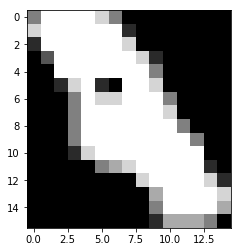

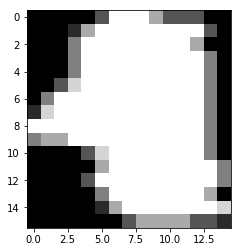

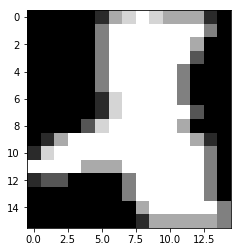

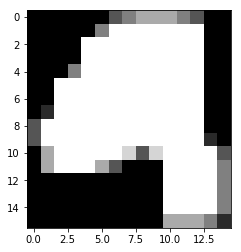

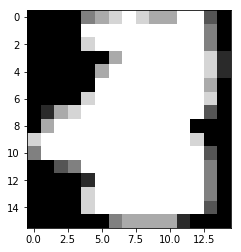

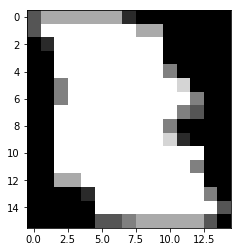

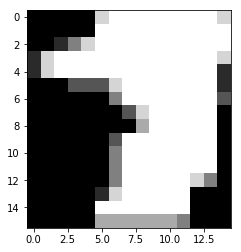

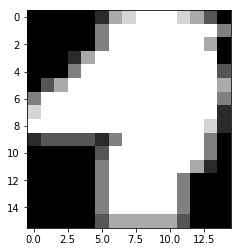

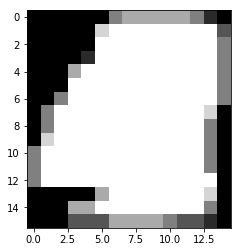

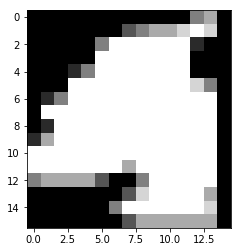

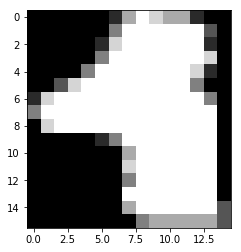

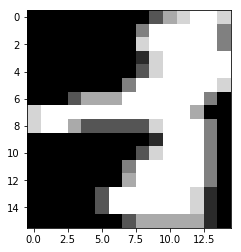

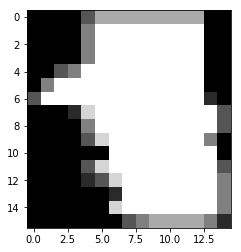

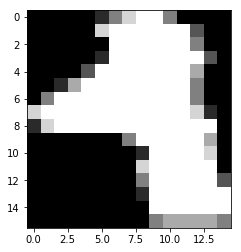

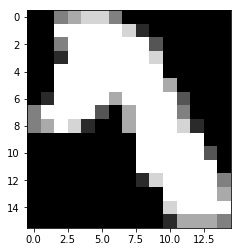

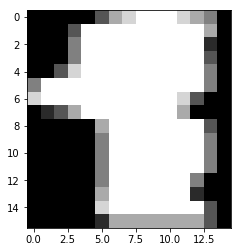

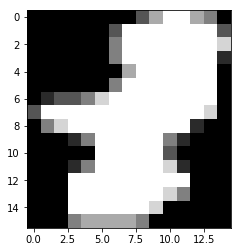

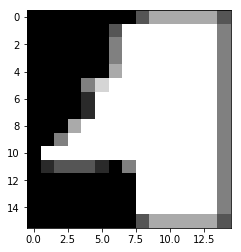

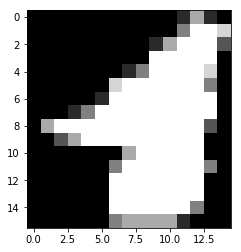

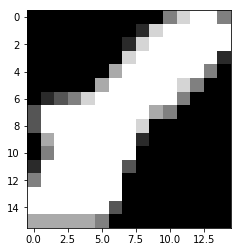

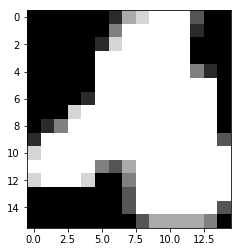

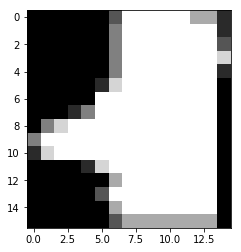

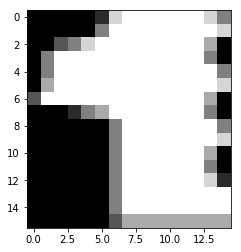

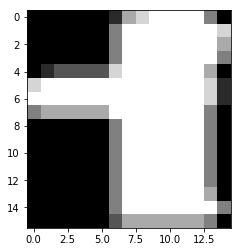

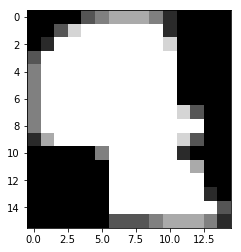

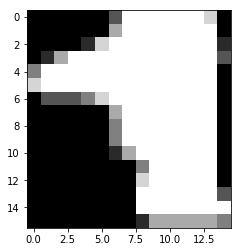

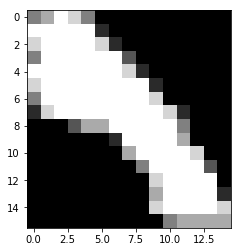

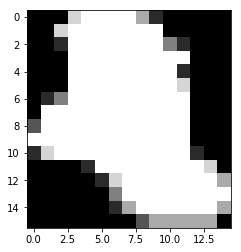

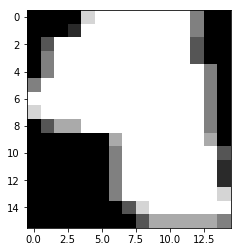

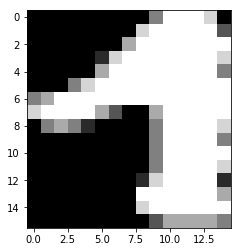

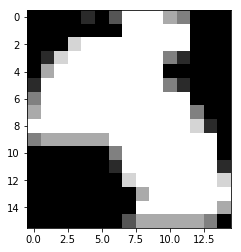

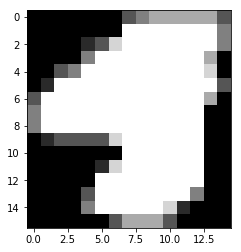

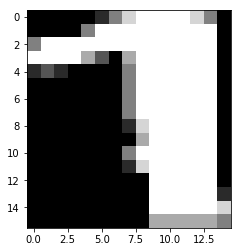

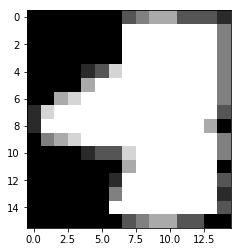

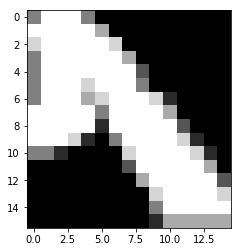

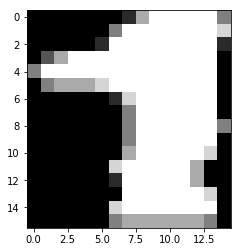

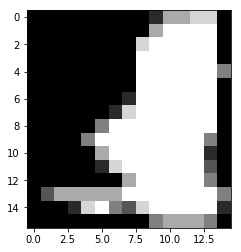

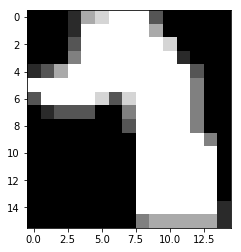

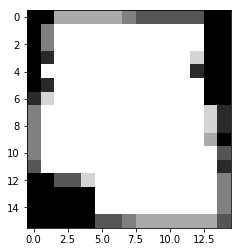

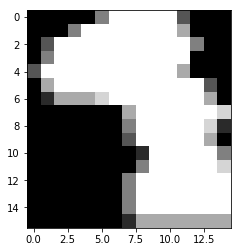

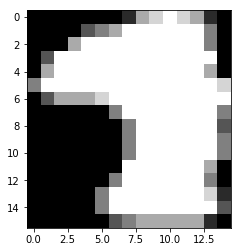

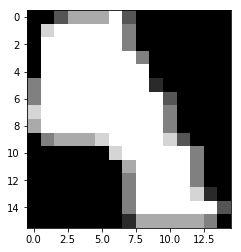

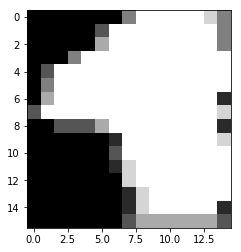

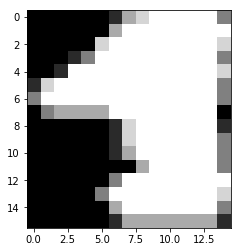

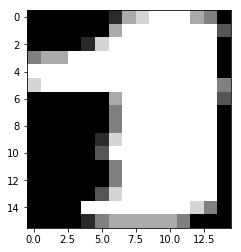

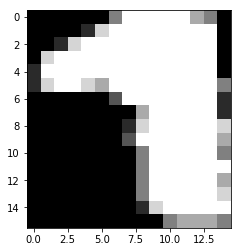

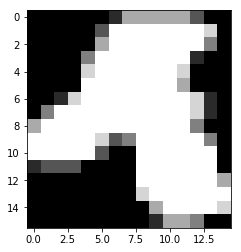

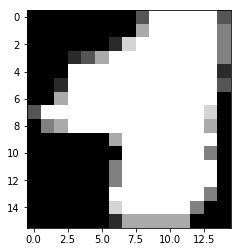

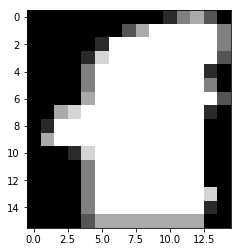

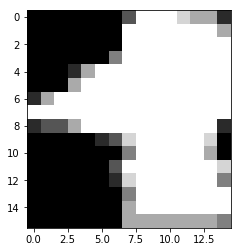

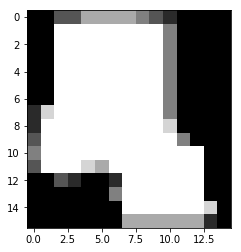

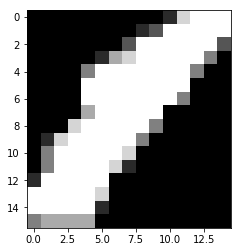

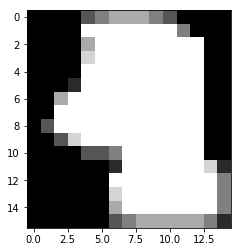

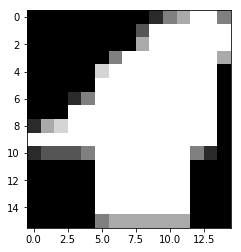

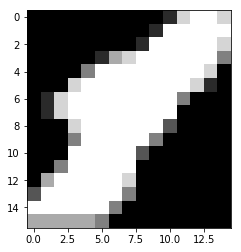

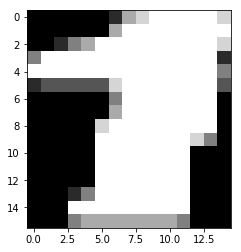

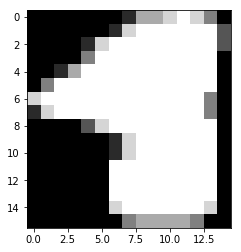

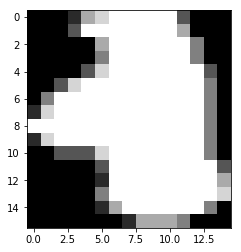

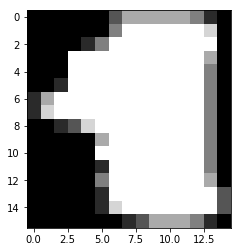

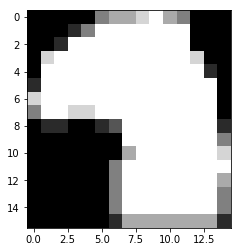

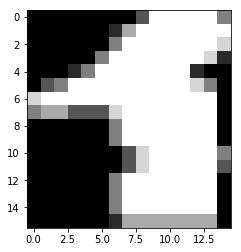

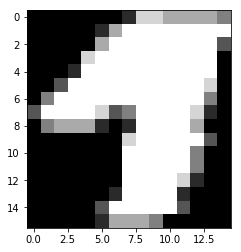

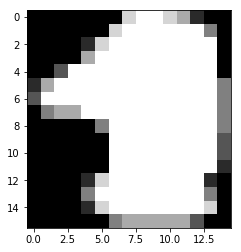

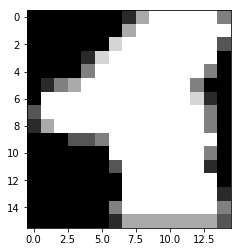

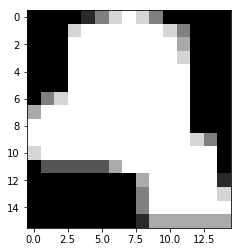

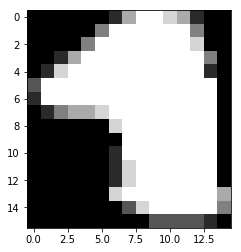

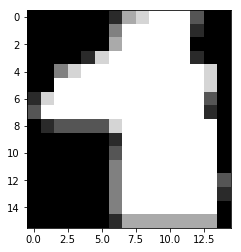

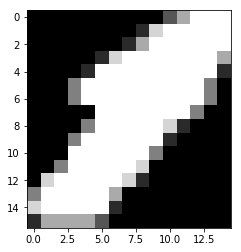

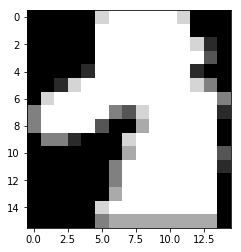

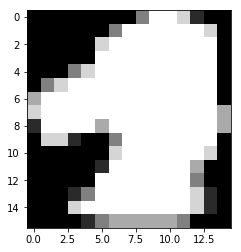

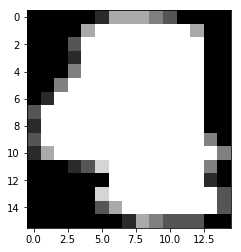

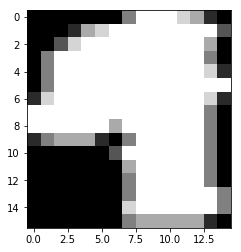

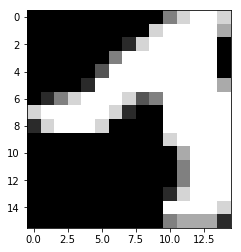

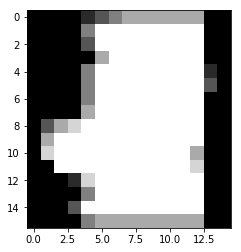

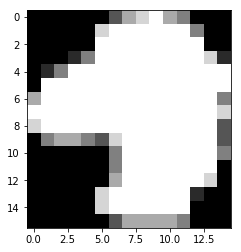

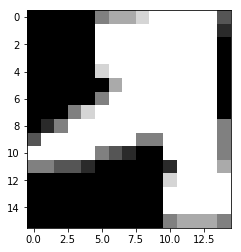

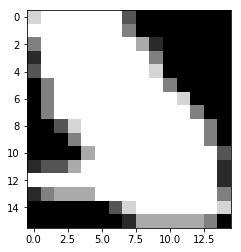

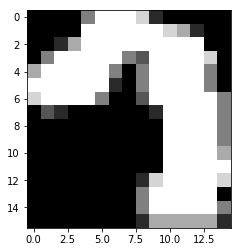

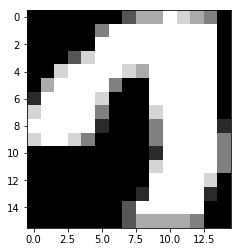

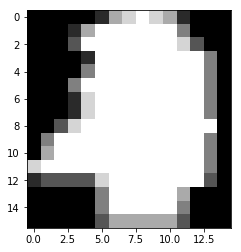

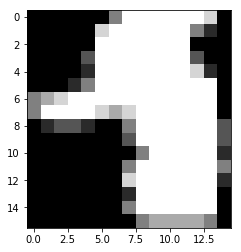

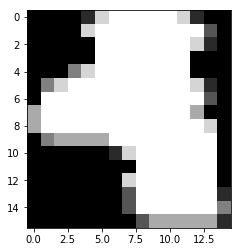

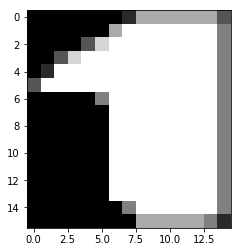

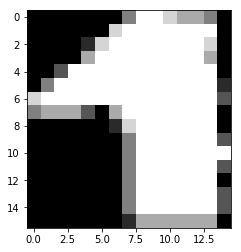

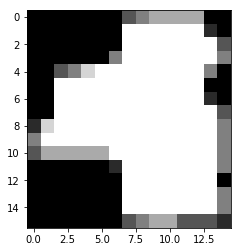

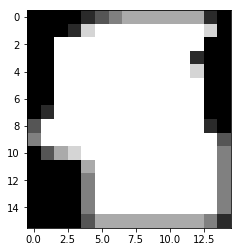

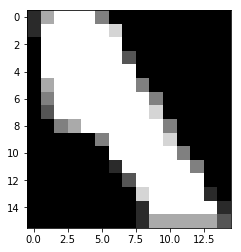

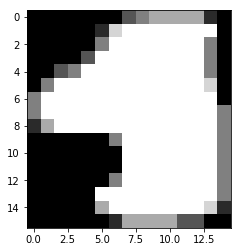

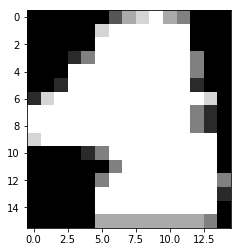

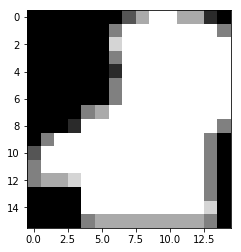

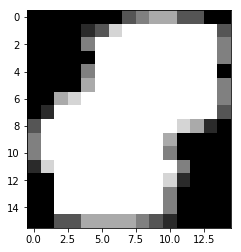

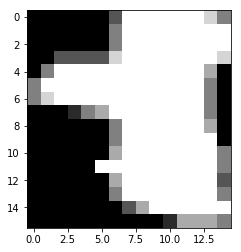

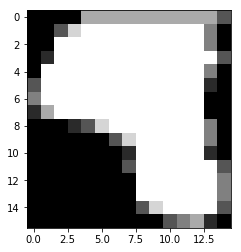

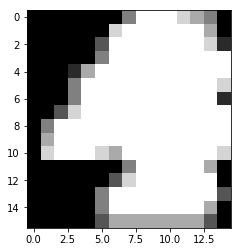

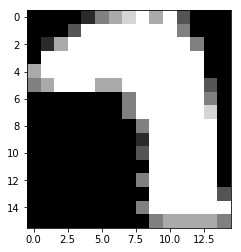

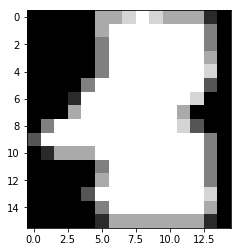

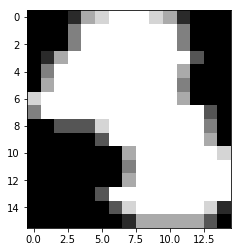

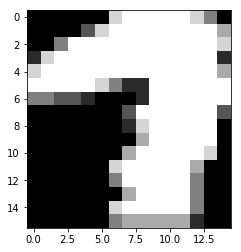

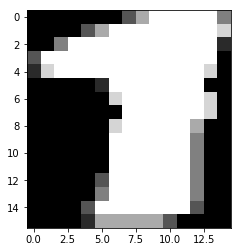

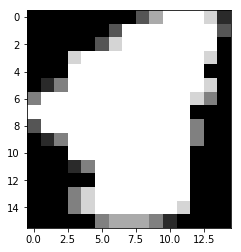

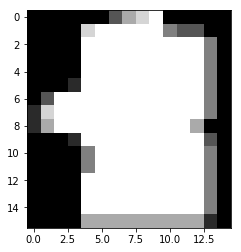

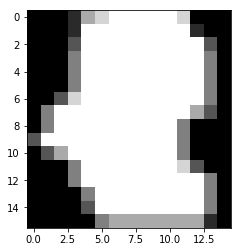

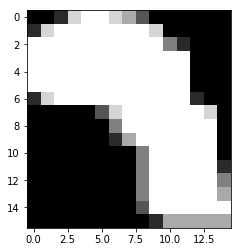

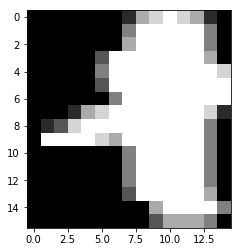

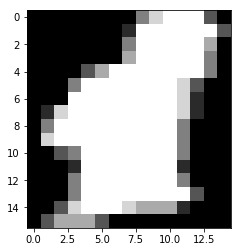

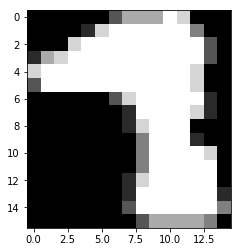

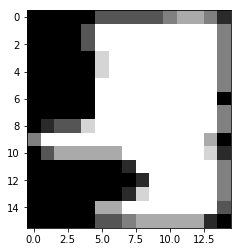

In [18]:
# k = 200
centers = k_means(img_ones, 200, 10)
imgs_cat(centers)

## k-means algorithm with k = 1
With k = 1, the algorithm simply calculate the mean value of the vectors, and the number of iteration doesn't matter anymore.
The following code will demonstrate it.

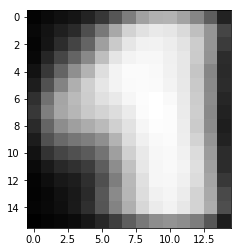

In [11]:
center = k_means(img_ones, 1, 1)[0]
img_cat(center)

This image above looks like a 1, and actually it is just its mean.

In [12]:
mean = np.mean(img_ones, axis = 0)

In [13]:
print("distance:{}".format(distance(mean, center)))

distance:0.057458306478074955


As you can see above, the error is minimal (10 to the power of -15)

In [14]:
# add more iteration
for i in range(1, 11):
    center = k_means(img_ones, 1, i)[0]
    print("distance:{}".format(distance(mean, center)))

distance:3.2033349409162933e-15
distance:0.000288727990052091
distance:0.00028873520843181123
distance:0.0002887352084325512
distance:0.0002887352084325512
distance:0.0002887352084325512
distance:0.0002887352084325512
distance:0.0002887352084325512
distance:0.0002887352084325512
distance:0.0002887352084325512


Also, the iteration does not matter. It just one cluster, and it will only require one iteration to calculate the correct center.

## with k = 200
k = 200 means it will start with all 200 points, and the distance from the points in each cluster to its center is 0, and the iteration does not change anything, so it will just return each of the 200 images as centers.